In this Notebook you guys will implement linear regression using NumPy

We have provided hints along the way in the comments

Some cells we have commented "#DO NOT EDIT" please do not edit these cells as they will be used for evaluating your assignment


Any extra cells used must be commented to explain what is being done

BEST OF LUCK !!





In [670]:
# Importing neccessary libraries
# Do not import anything else

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [671]:
# Import the dataset
training_data_path = ".\lin_reg_dataset\dataset.csv";
data = pd.read_csv(training_data_path, index_col = 'Serial No.');

In [672]:
data.head()

,varA,varB,varC,varD,varE,varF,Target
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,0.92
2,324,107,4,4.0,4.5,8.87,0.76
3,316,104,3,3.0,3.5,8.00,0.72
4,322,110,3,3.5,2.5,8.67,0.80
5,314,103,2,2.0,3.0,8.21,0.65


In [673]:
# Separate features and target variables
y = data.loc[:, 'Target']
X = data.loc[:, [column for column in data.columns if column != 'Target']]

In [674]:
# Extra preproccesing if required
# Hint: you may need to use .to_numpy and reshape functions

y = y.to_numpy().reshape(-1, 1);
X = X.to_numpy()

print(f"Shape of X : {X.shape} \nShape of y : {y.shape}")

Shape of X : (500, 6) 
Shape of y : (500, 1)


In [675]:
# Split train and test dataset use test size=0.2 and random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [676]:
# Debug arrays
debug_X = np.array([[1, 2, 3],
                    [2, 3, 4]])
debug_y = np.array([[10], [4], [10]])
debug_w = np.array([[2], [3], [1]])

In [677]:
# Other preprocessing if required(transpose a matrix maybe?)
# Not required

In [678]:
# Initialize weights
# Should return numpy array of weights and constant c
def weights_init(X_temp):
    # Your code here
    weights = np.zeros(X_temp.shape[1]).reshape(-1, 1)
    return weights

print(weights_init(debug_X))

[[0.]
 [0.]
 [0.]]


In [679]:
# Calculate Hypothesis
def hypo(theta, X_temp):
    # Your code here
    y_hat = X_temp @ theta
    return y_hat

print(hypo(debug_w, debug_X))

[[11]
 [17]]


In [680]:
# Calculate Cost
# Hint: use np.square
def cost(y_hat, y_temp):
    # Your code here
    m = y_temp.shape[0]
    J = np.square(y_hat - y_temp);
    J = 1 / (2 * m) * float(sum(J))
    return J

print(cost(np.ones(3).reshape(-1, 1), debug_y))

28.5


In [681]:
# Perform gradient descent
def gradient_descent(theta, X_temp, y_temp, y_hat, alpha):
    # Your code here 
    m = y_temp.shape[0]
    theta -= alpha / m * np.transpose(X_temp) @ (y_hat - y_temp)
    return theta


In [682]:
# Assemble Your linear regression model 
# Make it print cost after 25%, 50%, 75%, 100% of the iterations are complete 
# Also add an option to disable cost output and directly print cost after last iteration 
# Hint: use verbose as extra arguement of function
# Costs is array of all costs
def lin_model_fit(X_temp, y_temp, alpha, iterations, verbose):
    # Your code here
    theta = weights_init(X_temp)
    costs = []
    for iteration in range(iterations):
        theta = gradient_descent(theta, X_temp, y_temp, hypo(theta, X_temp), alpha)
        J = cost(hypo(theta, X_temp), y_temp)
        costs.append(J)
        if iteration == int(iterations / 4) and verbose :
            print(f"Cost after {iteration} / {iterations} iterations : {J:.5f}")
        if iteration == int(iterations / 2) and verbose :
            print(f"Cost after {iteration} / {iterations} iterations : {J:.5f}")
        if iteration == int(3 * iterations / 4) and verbose :
            print(f"Cost after {iteration} / {iterations} iterations : {J:.5f}")
    
    print(f"Cost after {iterations} / {iterations} iterations : {J:.5f}")
    
    return theta, J, costs
    

In [683]:
# Fit model to data
# Use alpha = 0.01,iter = 100
_, _, costs_diverging = lin_model_fit(X_train, y_train, 0.01, 100, True);

Cost after 25 / 100 iterations : 79043022334823846587851241288158207899728798163333705247382285465824648231585242561281688923803734088982537067040734678277342332664060843781906533265698717696.00000
Cost after 50 / 100 iterations : inf
Cost after 75 / 100 iterations : inf
Cost after 100 / 100 iterations : inf


C:\Users\Anirudh Achal\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


Without normalization gradient descent diverges for larger alpha. I will choose a much smaller alpha so that it can converge.

In [684]:
_, _ , unnormalized_costs = lin_model_fit(X_train, y_train, 0.00001, 100, True);

Cost after 25 / 100 iterations : 0.00716
Cost after 50 / 100 iterations : 0.00715
Cost after 75 / 100 iterations : 0.00714
Cost after 100 / 100 iterations : 0.00712


In [685]:
# Normalize Data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [686]:
# Fit model to normalised data using minmaxscaler
# Use alpha = 0.01, iter = 100

_, _, normalized_costs = lin_model_fit(X_train, y_train, 0.01, 100, True);

Cost after 25 / 100 iterations : 0.09501
Cost after 50 / 100 iterations : 0.03925
Cost after 75 / 100 iterations : 0.02027
Cost after 100 / 100 iterations : 0.01394


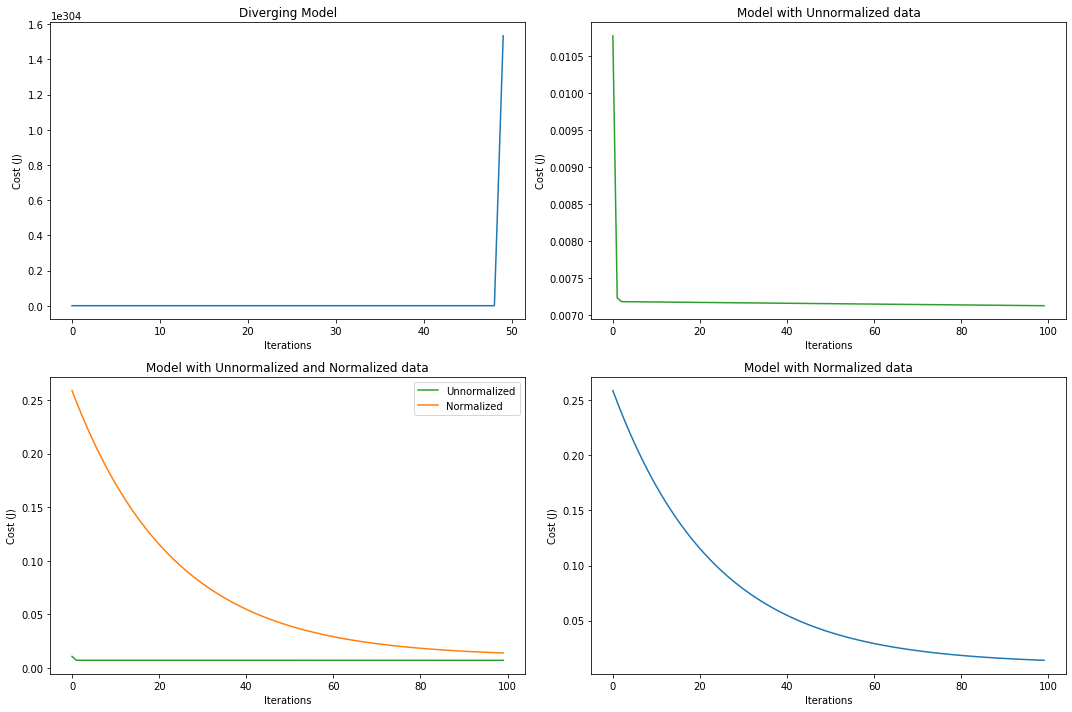

In [687]:
# Draw combined graph of above models of cost V/s iterations
fig, axs = plt.subplots(2, 2, figsize = (15, 10))

# Divering Model
axs[0, 0].plot(costs_diverging)
axs[0, 0].title.set_text("Diverging Model")
axs[0, 0].set_ylabel("Cost (J)")
axs[0, 0].set_xlabel("Iterations")

# Plot on data without normalization
axs[0, 1].plot(unnormalized_costs, 'C2')
axs[0, 1].title.set_text("Model with Unnormalized data")
axs[0, 1].set_ylabel("Cost (J)")
axs[0, 1].set_xlabel("Iterations")

# Plot on data without and with normalization
axs[1, 0].plot(unnormalized_costs, 'C2', label = 'Unnormalized')
axs[1, 0].plot(normalized_costs, 'C1', label = 'Normalized')
axs[1, 0].title.set_text("Model with Unnormalized and Normalized data")
axs[1, 0].set_ylabel("Cost (J)")
axs[1, 0].set_xlabel("Iterations")
axs[1, 0].legend()

# Plot on data with normalization
axs[1, 1].plot(normalized_costs)
axs[1, 1].title.set_text("Model with Normalized data")
axs[1, 1].set_ylabel("Cost (J)")
axs[1, 1].set_xlabel("Iterations")

plt.tight_layout()
plt.show()

We see that gradient descent works best for the normalized data. However it doesn't seem to have completely converged. I will run the linear regression on this normalized data for more iterations.

Cost after 250 / 1000 iterations : 0.01026
Cost after 500 / 1000 iterations : 0.00993
Cost after 750 / 1000 iterations : 0.00966
Cost after 1000 / 1000 iterations : 0.00941


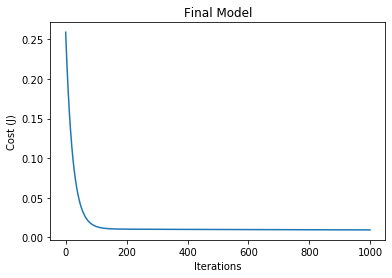

In [688]:
# Training data for more iterations
final_theta, J, costs = lin_model_fit(X_train, y_train, 0.01, 1000, True);

plt.plot(costs)
plt.title('Final Model')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.show()

Clearly the cost function has now converged

In [689]:
# Store best value of weights in weights_final
weights_final = final_theta
print(weights_final)

[[0.20050284]
 [0.21120136]
 [0.10815878]
 [0.18359909]
 [0.24311266]
 [0.25620892]]


In [690]:
# Write function to use model on data for prediction
def predict(X_temp, theta):
    # Your code here
    prediction = hypo(theta, X_temp)
    return prediction

In [691]:
# Calculate accuracy (RMS)
def accuracy(y_temp, y_hat):
    acc = np.sqrt(1 / (y_temp.shape[0]) * float(sum(np.square(y_temp - y_hat))))
    return acc

In [692]:
# Call predict function to make predictions on test and train data
# DO NOT EDIT
pred_train=predict(X_train, weights_final)
pred_test=predict(X_test, weights_final)


In [693]:
# DO NOT EDIT
print("=============For train data:=============")
acc1=accuracy(y_train, pred_train)
print("accuracy: %.5f" %(acc1))
print("\n\n=============For test data================")
acc2=accuracy(y_test, pred_test)
print("accuracy: %.5f" %(acc2))

=============For train data:=============
accuracy: 0.13722


=============For test data================
accuracy: 0.11613


The below cells plot y_hat vs y
The closer the plot is to a straight line;The better your model

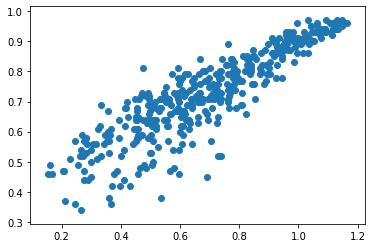

In [694]:
plt.scatter(pred_train, y_train)
plt.show()

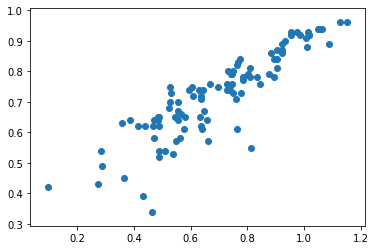

In [695]:
plt.scatter(pred_test, y_test)
plt.show()

### Adding Regularization to Linear Regression

In [696]:
def cost_regularized(y_hat, y_temp, L, theta):
    # Your code here
    m = y_temp.shape[0]
    J = 1 / (2 * m) * (float(sum(np.square(y_hat - y_temp))) + L * float(sum(np.square(theta))))
    return J


In [697]:
# Perform gradient descent
def gradient_descent_regularized(theta, X_temp, y_temp, y_hat, alpha, L):
    # Your code here 
    m = y_temp.shape[0]
    theta -= alpha / m * (np.transpose(X_temp) @ (y_hat - y_temp) + L * theta)
    return theta


In [698]:
# Assemble Your linear regression model 
# Make it print cost after 25%,50%,75%,100% of the iterations are complete 
# Also add an option to disable cost output and directly print cost after last iteration 
# Hint use verbose as extra arguement of function
# Costs is array of all costs
def lin_model_fit_regularized(X_temp, y_temp, alpha, iterations, verbose, L):
    # Your code here
    theta = weights_init(X_temp)
    costs = []
    for iteration in range(iterations):
        theta = gradient_descent_regularized(theta, X_temp, y_temp, hypo(theta, X_temp), alpha, L)
        J = cost_regularized(hypo(theta, X_temp), y_temp, L, theta)
        costs.append(J)
        if iteration == int(iterations / 4) and verbose :
            print(f"Cost after {iteration} / {iterations} iterations : {J:.5f}")
        if iteration == int(iterations / 2) and verbose :
            print(f"Cost after {iteration} / {iterations} iterations : {J:.5f}")
        if iteration == int(3 * iterations / 4) and verbose :
            print(f"Cost after {iteration} / {iterations} iterations : {J:.5f}")
    
    print(f"Cost after {iterations} / {iterations} iterations : {J:.5f}")
    
    return theta, J, costs

Cost after 250 / 1000 iterations : 0.01328
Cost after 500 / 1000 iterations : 0.01301
Cost after 750 / 1000 iterations : 0.01281
Cost after 1000 / 1000 iterations : 0.01265


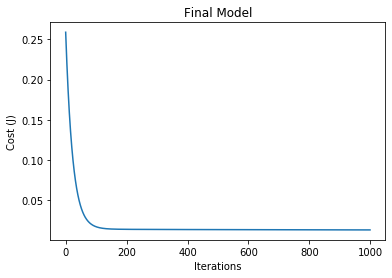

In [699]:
final_theta_reg, J_reg, costs_reg = lin_model_fit_regularized(X_train, y_train, 0.01, 1000, True, 10);

plt.plot(costs_reg)
plt.title('Final Model')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.show()

In [700]:
weights_final_reg = final_theta_reg
print(weights_final_reg)

pred_train_reg = predict(X_train, weights_final_reg)
pred_test_reg = predict(X_test, weights_final_reg)

[[0.1970579 ]
 [0.20717177]
 [0.11510871]
 [0.18426439]
 [0.23793302]
 [0.24759111]]


In [701]:
# DO NOT EDIT
print("=============For train data:=============")
acc1 = accuracy(y_train, pred_train_reg)
print("accuracy: %.5f" %(acc1))
print("\n\n=============For test data================")
acc2 = accuracy(y_test, pred_test_reg)
print("accuracy: %.5f" %(acc2))

=============For train data:=============
accuracy: 0.13832


=============For test data================
accuracy: 0.11681


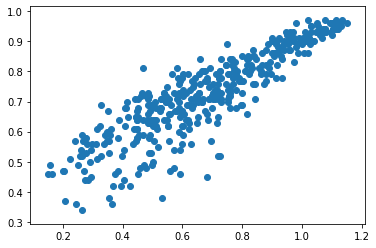

In [702]:
plt.scatter(pred_train_reg, y_train)
plt.show()

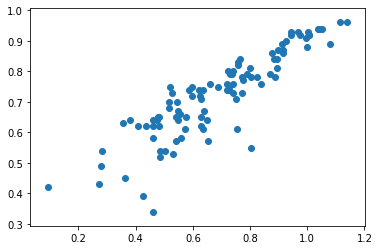

In [703]:
plt.scatter(pred_test_reg, y_test)
plt.show()

Regularization does not seem be improving the model accuracy. Since the model was originally performing well for test data, this was expected.

The Below questions are optional and can be done for brownie points

In [704]:
# Try out hyperparameter tuning for alpha
def Kfold_cross_validation(X_temp, y_temp, alphas, cv):
    validation_size = y_temp.shape[0] // cv
    best_theta = []
    best_alpha = np.Infinity
    best_cost = np.Infinity
    for alpha in alphas:
        cost_test = 0
        for validation_round in range(cv):
            test_rows = np.array(range(validation_round * validation_size, min((validation_round + 1) * validation_size, y_temp.shape[0])))
            train_rows = np.array([x for x in range(0, y_temp.shape[0]) if x not in range(validation_round * validation_size, min((validation_round + 1) * validation_size, y_temp.shape[0]))])
            X_train_temp = X_temp[train_rows, :]
            X_test_temp = X_temp[test_rows, :]
            y_train_temp = y_temp[train_rows, :]
            y_test_temp = y_temp[test_rows, :]
            theta_reg_cv, J_reg_cv, costs_reg_cv = lin_model_fit_regularized(X_train_temp, y_train_temp, alpha, 1000, False, 10);
            cost_test += cost(hypo(theta_reg_cv, X_test_temp), y_test_temp) 
        cost_test /= cv
        print(f"Best cost for alpha : {alpha} ==> {cost_test:.5f}\n")
        if(cost_test < best_cost):
            best_alpha = alpha
            best_cost = cost_test
            
    print(f"Best Alpha : {best_alpha}\n")
    print("Training with best alpha...\n")
    best_theta, best_cost, _ = lin_model_fit_regularized(X_train, y_train, best_alpha, 10000, True, 10);
    print(f"\nBest Cost overall (using alpha: {best_alpha}) : {best_cost:.5f}")
        
    return best_alpha, best_cost, best_theta

alpha, _, best_theta_reg_cv = Kfold_cross_validation(X_train, y_train, [0.01, 0.001, 0.5, 1], 4);

Cost after 1000 / 1000 iterations : 0.01367
Cost after 1000 / 1000 iterations : 0.01389
Cost after 1000 / 1000 iterations : 0.01335
Cost after 1000 / 1000 iterations : 0.01386
Best cost for alpha : 0.01 ==> 0.00968

Cost after 1000 / 1000 iterations : 0.01754
Cost after 1000 / 1000 iterations : 0.01790
Cost after 1000 / 1000 iterations : 0.01750
Cost after 1000 / 1000 iterations : 0.01824
Best cost for alpha : 0.001 ==> 0.01475

Cost after 1000 / 1000 iterations : 0.01330
Cost after 1000 / 1000 iterations : 0.01345
Cost after 1000 / 1000 iterations : 0.01296
Cost after 1000 / 1000 iterations : 0.01348
Best cost for alpha : 0.5 ==> 0.00875

Cost after 1000 / 1000 iterations : 605201833885885448869550593624572969746827146458118975202054707108698685895181348247845022395042057278131575588908881203310730958499573682098250135736770856769523023872.00000
Cost after 1000 / 1000 iterations : 239467526702621208484612027567652452500464144150958397370703673487209589909471268773613729234535894351462

In [705]:
# Print your best accuracy acheived and hyperparameter value
weights_final_reg_cv = best_theta_reg_cv
print(weights_final_reg_cv)
pred_train_reg = predict(X_train, weights_final_reg_cv)
pred_test_reg = predict(X_test, weights_final_reg_cv)

# DO NOT EDIT
print("=============For train data:=============")
acc1 = accuracy(y_train, pred_train_reg)
print("accuracy: %.5f" %(acc1))
print("\n\n=============For test data================")
acc2 = accuracy(y_test, pred_test_reg)
print("accuracy: %.5f" %(acc2))


[[0.19059571]
 [0.21381119]
 [0.01603226]
 [0.14791169]
 [0.26444208]
 [0.35192954]]
=============For train data:=============
accuracy: 0.12950


=============For test data================
accuracy: 0.11220


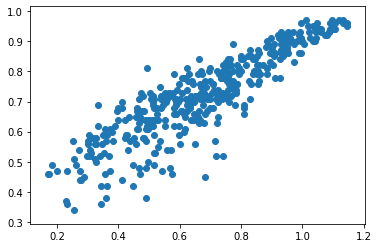

In [706]:
plt.scatter(pred_train_reg, y_train)
plt.show()

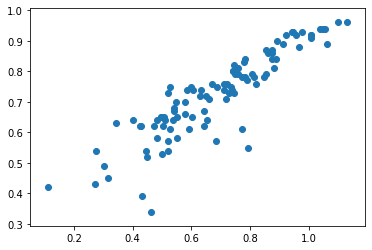

In [707]:
plt.scatter(pred_test_reg, y_test)
plt.show()

The Best alpha found after hyperparameter tunig was alpha = 0.5.

Overall Best Accuracy (lowest Error (Root mean square Error)) for Training Data : 0.12950

Overall Best Accuracy (lowest Error (Root mean square Error)) for Test Data : 0.11220

# This is the work of Anirudh Achal